### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import time 

import matplotlib.pyplot as plt

# from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.random_projection import GaussianRandomProjection
from scipy.stats import kurtosis

from textwrap import wrap

### Load Dataset

In [2]:
RANDOM_SEED = 25


columns = ['Radius','Texture','Perimeter','Area','Smoothness','Compactness',
           'Concavity','Concave_Points','Symmetry','Fractal_Dimension',
           'Malignant/Benign']

# Read CSV file into pandas df
df = pd.read_csv('../datasets/breast_cancer/breast-cancer-wisconsin.csv',
                 delimiter=',', quotechar='"', names=columns)

### Dataframe without Preprocessing 

In [3]:
print("Printing dataframe head (without any preprocessing)....")
print(df.head(10))

Printing dataframe head (without any preprocessing)....
    Radius  Texture  Perimeter  Area  Smoothness  Compactness Concavity  \
0  1000025        5          1     1           1            2         1   
1  1002945        5          4     4           5            7        10   
2  1015425        3          1     1           1            2         2   
3  1016277        6          8     8           1            3         4   
4  1017023        4          1     1           3            2         1   
5  1017122        8         10    10           8            7        10   
6  1018099        1          1     1           1            2        10   
7  1018561        2          1     2           1            2         1   
8  1033078        2          1     1           1            2         1   
9  1033078        4          2     1           1            2         1   

   Concave_Points  Symmetry  Fractal_Dimension  Malignant/Benign  
0               3         1                  1     

### Dataset Preprocessing 

In [4]:
# Shuffle
df = shuffle(df, random_state=RANDOM_SEED)

# DROP USELESS ROWS AND COLUMNS
df.dropna(inplace=True)
cols = [0]
# Drop ID column (it's not attribute or target)
df.drop(df.columns[cols],axis=1,inplace=True)
# Drop all data points with missing variables  (denoted by '?' entry)
nostrings_row_list = [x.isdigit() for x in df.iloc[:,5]]
df = df[nostrings_row_list]


# Handle categorical data
# df = pd.get_dummies(df)


# Split data into X and y vectors
X = df.ix[:, df.columns != 'Malignant/Benign']
y = df['Malignant/Benign']

# Change 2 -> 0 (benign) and 4 -> 1 (malignant)
y.replace(2, 0, inplace=True)
y.replace(4, 1, inplace=True)

/home/saksham/.local/lib/python3.5/site-packages/ipykernel_launcher.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


### Sanity Check on Dataframe 


In [5]:
print("Sanity Check: Printing out dataframe and shape after preprocessing... ")
print(df.head(10))
print("df.shape: ", df.shape)


Sanity Check: Printing out dataframe and shape after preprocessing... 
     Texture  Perimeter  Area  Smoothness  Compactness Concavity  \
437        4          1     1           1            2         1   
511        5          1     1           1            2         1   
215        8          7     8           7            5         5   
684        1          1     1           1            2         1   
302       10         10    10           7            9        10   
341        1          1     1           1            2         1   
608        5         10    10          10           10        10   
366        6         10    10          10            8        10   
205        5         10    10           9            6        10   
270        8          4     7           1            3        10   

     Concave_Points  Symmetry  Fractal_Dimension  Malignant/Benign  
437               1         1                  1                 0  
511               2         1             

### Training and Testing Split, Scaling 

In [6]:
# # Split into 30%  training data, 70% testing data
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     test_size=0.30, random_state=RANDOM_SEED)


# # Apply scaling. Large values of certain features undesireable for NN
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

### Sanity Check on X

In [6]:
print(X)

     Texture  Perimeter  Area  Smoothness  Compactness Concavity  \
437        4          1     1           1            2         1   
511        5          1     1           1            2         1   
215        8          7     8           7            5         5   
684        1          1     1           1            2         1   
302       10         10    10           7            9        10   
341        1          1     1           1            2         1   
608        5         10    10          10           10        10   
366        6         10    10          10            8        10   
205        5         10    10           9            6        10   
270        8          4     7           1            3        10   
586        8         10    10          10            6        10   
264        7          9     4          10           10         3   
554        3          1     1           1            2         1   
509        2          1     1           1       

### Analysis Helper Function 

In [69]:
def analyze_data_list(data_list): 
    arr = np.array(data_list)
    variance = np.var(arr)
    mean = np.mean(arr)
    
    return mean, variance 
    

### Clustering Without Dimensionality Reduction 

In [7]:
clf = KMeans(n_clusters=2, random_state=0)
clf.fit(X)
error = mean_squared_error(y, clf.predict(X))
print("Printing error (without Dim. Reduc.) ... ", error)

Printing error (without Dim. Reduc.) ...  0.03953147877013177


### Randomized Projections - Followed by Clustering 

In [74]:
# NOTE: Need to run this one multiple times, keep the best runs, since it's random 

iterations_per_n_comp = 1000

error_list = list()


for i in range(iterations_per_n_comp): 


    rp = GaussianRandomProjection(n_components=n_comp)
    rp = rp.fit(X)
    X_dim_reduced = rp.transform(X)
#     print(rp.components_)


    clf_dimReduced = KMeans(n_clusters=2, random_state=0)
    clf_dimReduced.fit(X_dim_reduced)
    error_dimReduced = mean_squared_error(y, clf_dimReduced.predict(X_dim_reduced))
#     print("Printing error_dimReduced ... ", error_dimReduced)
    
    error_list.append(error_dimReduced)

# Get mean and variance from helper function 
mean, var = analyze_data_list(error_list)

print("Mean: ", mean, "Variance: ", var)

Mean:  0.21330893118594438 Variance:  0.08230678086728734


### Plot error data (for all the RP iterations)

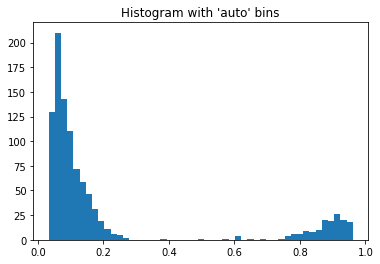

In [75]:
plt.hist(error_list, bins='auto')
plt.title("Histogram with 'auto' bins")
plt.show()